In [7]:
%config Completer.use_jedi = False

import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
from PIL import Image, ImageFilter, ImageColor

In [4]:
def visualize(image):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.imshow(image)

### Импорт

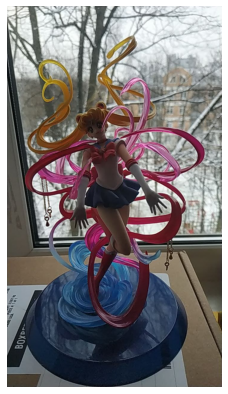

In [11]:
im = Image.open('../PY/photo_2021-03-21_11-05-43.jpg')
visualize(im)

### Фильтры через pillow

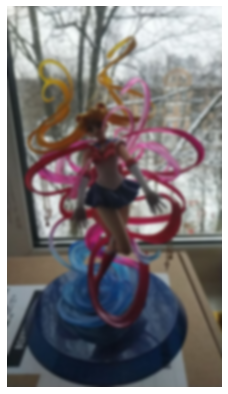

In [12]:
im_blur = im.filter(ImageFilter.GaussianBlur(radius=5))
visualize(im_blur)

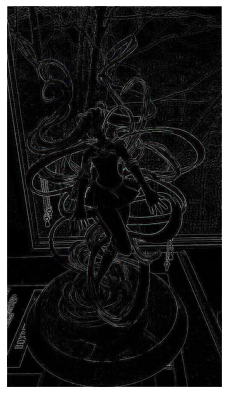

In [14]:
im_edges = im.filter(ImageFilter.FIND_EDGES())
visualize(im_edges)

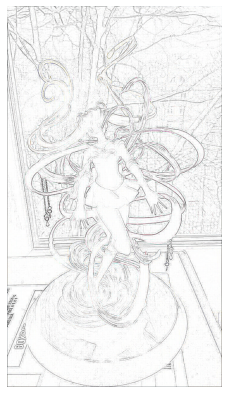

In [15]:
im_cont = im.filter(ImageFilter.CONTOUR())
visualize(im_cont)

### Фильтры напрямую по цветовым каналам

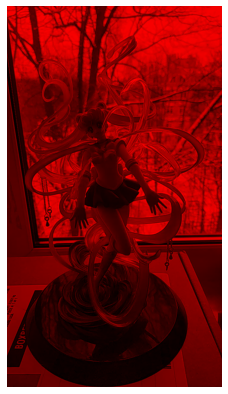

In [28]:
im_red = np.array(im)
im_red[:, :, 1] = 0
im_red[:, :, 2] = 0
visualize(im_red)

### Маскинг через albumentations

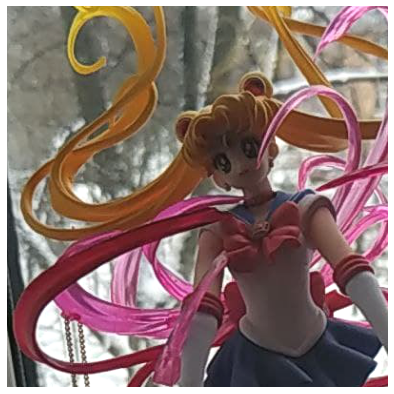

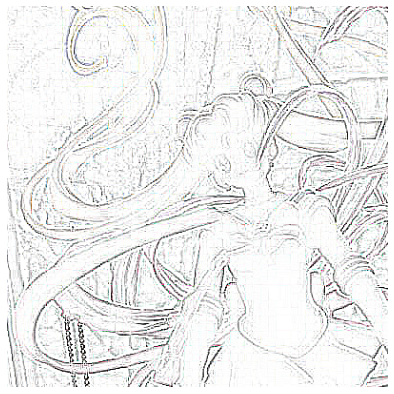

In [31]:
im_np = np.array(im)
im_cont_np = np.array(im_cont)

transform = A.Compose([
    A.RandomCrop(width=400, height=400),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
])

transformed = transform(image=im_np, mask=im_cont_np)
visualize(transformed['image'])
visualize(transformed['mask'])